
# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. 
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
**Question 1**: Does the budget of a movie have effect on the popularity?

**Question 2**: Does the rating of the movie affects the revenue?

**Question 3**: What are the top 10 highest voted movies and there directors?

**Question 4**: 10 movie genre combination with the most revenue?

In [6]:
# import required libraries needed for analysis and visualizations 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [7]:
#loading the data source file with pandas via a direct url (absolute path)
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')


In [8]:
#Display the first few rows with pandas head() function.
#This will give first glance at the dataset to see the structure of columns and datas available in the row
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
#After i have seen the structure of the dataframe, I will use the pandas shape method to know the 
#dimension of my dataframe such as the numbers of rows and columns present in the dataframe.
df.shape

(10866, 21)

This output above shows the dataframe is having 10866 rows and 21 columns.

### Verification of data types
     In other to verify the datatype associated with each variable, pandas dtypes method was used.
     This will return the data types of the variables giving me the oppotunity to know if the data types are correct
     If not then it will e changed to the preffered choice.

In [10]:
#Checking the data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Verification of duplicated data
            This is to see if the dataframe contain any duplicate records. I used pandas method duplicated() to check along with sum() so that i can get the total number of duplicated records.

In [11]:
#Checking for duplicate rows
df.duplicated().sum()

1

The output above shows only one duplicate row in the dataframe

In [12]:
#Checking for the number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The above table shows that theere are 4 columns with float sa data types, 6 with interger and 11 with string values.

In [13]:
#Checking statistical summary of the dataframe. 
df.describe(include = 'all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://phantasm.com,Woody Allen,Based on a true story.,...,No overview found.,NaN,Drama,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


In [14]:
#check for summary of missing values present in each variable if any.
#pandas menthod isnull() was used to check for missing values along with sum() which help return the count values.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [19]:
#Declaring a function percentage_count() to avoid code repition
def percentage_count(value):
    return value*100/len(df)
    

In [21]:
#checking for the percentage of the missing values using the function percentage_count(value) decleared.
percentage_count(df.isnull().sum())

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

In [145]:
#check for number of unique values 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [146]:
#drop the duplicate row
df.drop_duplicates(inplace = True)

In [147]:
#confirm if the row has been successfully dropped
df.duplicated().sum()

0

In [148]:
#drop the unwanted columns such as homepage, tagline, keywords and production_companies
#see link as reference [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#]
df = df.drop(['homepage', 'tagline', 'keywords', 'production_companies'], axis = 1)

In [149]:
#verify if the columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                10865 non-null int64
imdb_id           10855 non-null object
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
overview          10861 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


In [150]:
#drop the rows with missing values since they are not significant
df.dropna(inplace = True)

In [151]:
#confirm total number of missing values again
df.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [152]:
#convert the release_date column into date type
df['release_date'] = pd.to_datetime(df['release_date'])

In [153]:
#convert the poplarity column to integer
df['popularity']= df['popularity'].astype(int)

In [154]:
#Remove the tt at the begining of imdb_id and convert to int
df['imdb_id'] = df['imdb_id'].str.extract('(\d+)').astype(int)

In [155]:
#display the title of movies with runtime of atleast 3hrs (180 minutes)
df[df['runtime']>=180]['original_title']

415                                     Show Me a Hero
559                                    Childhood's End
609      The Jinx: The Life and Deaths of Robert Durst
989                                   Olive Kitteridge
1077                                           Houdini
1183                                         Ascension
1235                                          Klondike
1678                                             Alice
1802                                              Emma
1865                                              Life
1890                                            Hamlet
2107                                            Carlos
2155                                      Going Postal
2170                          The Pillars of the Earth
2214                                       The Pacific
2222                                           Ben Hur
2393          Never Sleep Again: The Elm Street Legacy
2414                                    The Green Mile
2469      

In [156]:
#verify all cleasing process has been effected
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,369610,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,1392190,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,2908446,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,2488496,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,2820852,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Does the budget of a movie have effect on the popularity?)

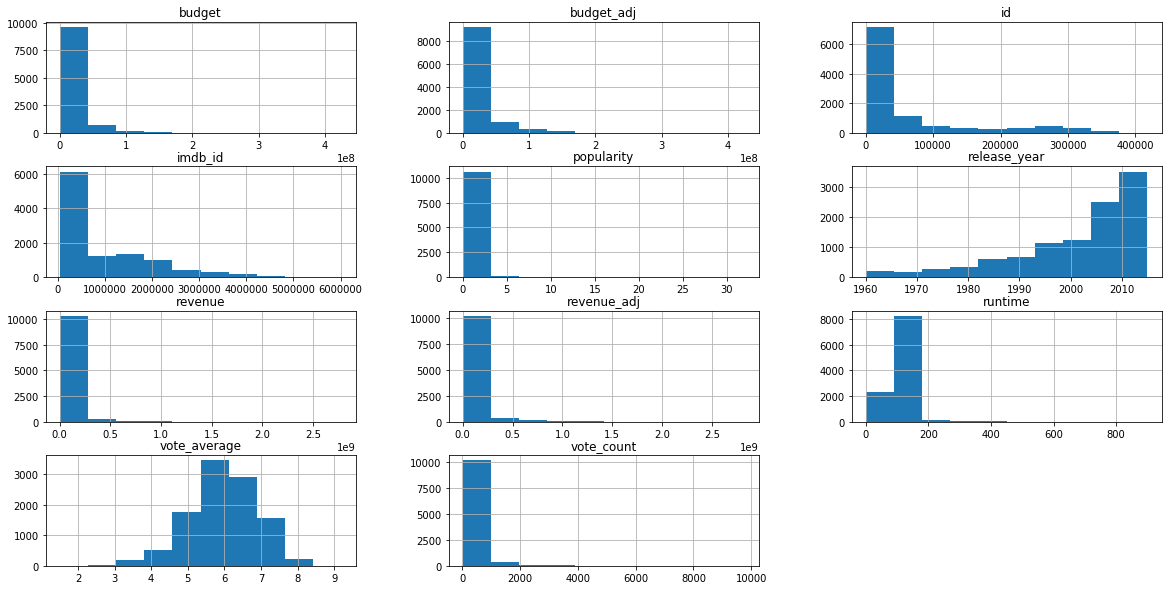

In [157]:
# Checking the visualizations of columns
df.hist(figsize= (20,10));

In [158]:
#using the groupby method to group popularity and budget
average_budget = df.groupby('popularity')['budget'].mean().sort_values(ascending = False)
average_budget

popularity
10    1.875000e+08
9     1.805000e+08
14    1.700000e+08
24    1.650000e+08
32    1.500000e+08
28    1.500000e+08
13    1.100000e+08
11    1.100000e+08
4     1.095625e+08
5     1.088871e+08
6     1.028000e+08
7     9.200000e+07
12    9.050000e+07
8     8.870000e+07
3     7.190000e+07
2     6.081546e+07
1     3.958250e+07
0     7.720548e+06
Name: budget, dtype: float64

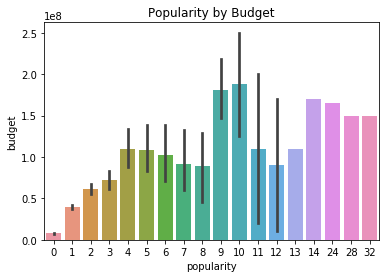

In [159]:
#Visualize the result using seaborn pyplot
sns.barplot(x='popularity',y='budget', data=df)
plt.title('Popularity by Budget')
plt.show()

The ablove plot show that the movies with the highest budget values have less than average popularity. Hence, the movie budget does not determine its popularity.

### Research Question 2  (Does the rating of the movie affects the revenue?)

In [160]:
#diplay the available columns in the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,369610,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,1392190,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,2908446,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,2488496,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,2820852,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [161]:
#count the values as occur in the vote_average columns
df['vote_average'].value_counts().sort_values(ascending=False)

6.1    491
6.0    487
5.8    482
5.9    469
6.2    463
6.3    457
6.5    452
6.4    443
5.7    414
5.6    411
6.6    409
5.5    380
6.7    368
5.3    355
5.4    336
6.8    321
6.9    306
5.2    298
7.0    270
7.1    263
5.1    254
5.0    214
7.2    213
4.9    205
7.3    185
4.8    185
4.7    149
7.4    133
4.6    121
7.5    114
      ... 
3.8     39
3.9     39
8.0     34
3.5     31
3.6     29
3.3     22
3.7     19
3.4     19
8.1     15
3.1     13
2.9      9
8.3      9
3.2      9
3.0      9
8.4      8
2.4      7
2.8      7
8.2      5
8.5      4
2.6      3
2.1      3
2.7      3
2.2      3
1.5      2
2.5      2
2.3      2
8.7      1
2.0      1
8.8      1
9.2      1
Name: vote_average, Length: 70, dtype: int64

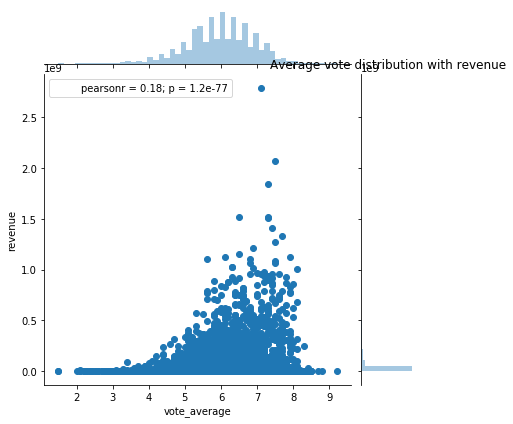

In [162]:
# creating a count plot for vote average and revenue.
sns.jointplot(x ='vote_average', y='revenue', data = df)
plt.title("Average vote distribution with revenue")
plt.show()


### Research Question 3  (What are the top 10 highest voted movies and there directors?)

In [163]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [164]:
#Get the top 10 movies with highest average_vote along with title and director 
#Reference - *Priyang Bhatt* for code structure
top_10 = df.nlargest(10,'vote_average')[['original_title','director','vote_average']].set_index('original_title')
top_10

,director,vote_average
original_title,,
The Story of Film: An Odyssey,Mark Cousins,9.2
Black Mirror: White Christmas,Carl Tibbetts,8.8
Pink Floyd: Pulse,David Mallet,8.7
The Art of Flight,Curt Morgan,8.5
A Personal Journey with Martin Scorsese Through American Movies,Martin Scorsese|Michael Henry Wilson,8.5
Queen - Rock Montreal,Saul Swimmer,8.5
Dave Chappelle: Killin' Them Softly,Stan Lathan,8.5
The Jinx: The Life and Deaths of Robert Durst,Andrew Jarecki,8.4
Rush: Beyond the Lighted Stage,Sam Dunn|Scot McFadyen,8.4


The above plot shows that most movies that have high average votes racks up more revenue

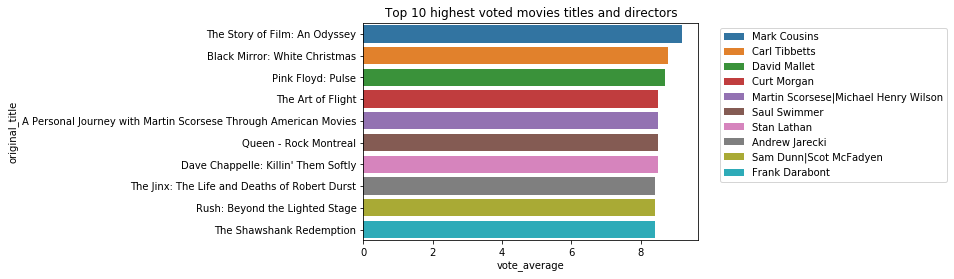

In [165]:
#using seaborn bar plot
sns.barplot(x ='vote_average', y=top_10.index, hue='director', data = top_10, dodge=False)
plt.title("Top 10 highest voted movies titles and directors")
#Diplaying the legend outside the graph. Ref:*Priyang Bhatt* 
plt.legend(bbox_to_anchor = (1.05,1), loc=2)
plt.show()

The above table and plot shows the top 10 movies' titles and there director based on the average vote.

### Research Question 4  (Top 10 movie genre combination with the most revenue?)

### Reference - 
[Priyang Bhatt](https://www.youtube.com/watch?v=Asm2_qgBK48) for code structure

In [26]:
#Get the percentage distribution of movie genre
percentage_count(df.genres.value_counts()).sort_values(ascending=False)

Drama                                               6.552549
Comedy                                              6.552549
Documentary                                         2.871342
Drama|Romance                                       2.659672
Comedy|Drama                                        2.576845
Comedy|Romance                                      2.466409
Horror|Thriller                                     2.383582
Horror                                              2.328364
Comedy|Drama|Romance                                2.043070
Drama|Thriller                                      1.270017
Comedy|Family                                       0.938708
Action|Thriller                                     0.929505
Thriller                                            0.855881
Drama|Comedy                                        0.846678
Animation|Family                                    0.828272
Crime|Drama|Thriller                                0.745445
Crime|Drama             

In [66]:
#Get the percentage distribution of movie year
release_year_percentage = percentage_count(df['release_year'].value_counts()).sort_values(ascending=False)
release_year_percentage

2014    6.442113
2013    6.064789
2015    5.788699
2012    5.411375
2011    4.969630
2009    4.905209
2008    4.564697
2010    4.509479
2007    4.030922
2006    3.754832
2005    3.349899
2004    2.825327
2003    2.586048
2002    2.448003
2001    2.227130
2000    2.089085
1999    2.061476
1998    1.932634
1996    1.877416
1997    1.766980
1994    1.693355
1993    1.638137
1995    1.610528
1988    1.334438
1989    1.260814
1992    1.224001
1991    1.224001
1990    1.214798
1987    1.150377
1986    1.113565
1985    1.003129
1984    0.966317
1981    0.754648
1982    0.745445
1983    0.736241
1980    0.717835
1978    0.598196
1979    0.524572
1977    0.524572
2071    0.506166
1973    0.506166
1976    0.432542
1974    0.432542
2066    0.423339
1975    0.404933
2064    0.386527
2070    0.377324
1972    0.368121
2067    0.368121
2068    0.358918
2065    0.322106
2063    0.312903
2060    0.294497
2062    0.294497
2069    0.285294
2061    0.285294
Name: release_year, dtype: float64

In [166]:
#Get the top 10 movies revenue along with title and genre 
#Reference - *Priyang Bhatt* for code structure
top_10_revenue = df.nlargest(10,'revenue')[['original_title','genres','revenue']].set_index('original_title')
top_10_revenue

,genres,revenue
original_title,,
Avatar,Action|Adventure|Fantasy|Science Fiction,2781505847
Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2068178225
Titanic,Drama|Romance|Thriller,1845034188
The Avengers,Science Fiction|Action|Adventure,1519557910
Jurassic World,Action|Adventure|Science Fiction|Thriller,1513528810
Furious 7,Action|Crime|Thriller,1506249360
Avengers: Age of Ultron,Action|Adventure|Science Fiction,1405035767
Harry Potter and the Deathly Hallows: Part 2,Adventure|Family|Fantasy,1327817822
Frozen,Animation|Adventure|Family,1274219009


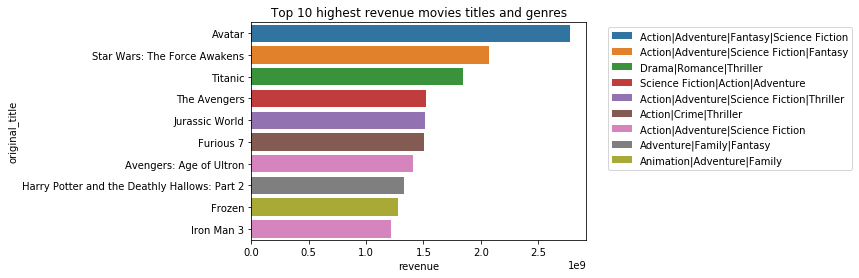

In [167]:
#using seaborn bar plot
sns.barplot(x ='revenue', y=top_10_revenue.index, hue='genres', data = top_10_revenue, dodge=False)
plt.title("Top 10 highest revenue movies titles and genres")
#Diplaying the legend outside the graph. Ref:*Priyang Bhatt* 
plt.legend(bbox_to_anchor = (1.05,1), loc=2)
plt.show()

The distribution above shows that the movie with the highest revenue have genres combination of Action, Adventures, Fantasy and science fiction.

In [168]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

<a id='conclusions'></a>
## Conclusions

My analysis shows that movies of Drama and comedy genres are most released, both having 6.5% of total movies released and it was also discovered that highest number of movie was released in 2004 (6.44%) between the year considered.
Also it was discovered that the budget of movies does not determine the popularity of the movie while it was discovered that the movies receiving high votes enjoy high revenue. The movie The Story of Film: An Odyssey is the most voted 9.2% and its directed by Mark Cousins while Action|Adventure|Fantasy|Science Fiction combination of movie genre produce the highest revenue when compared to other movie genre.